In [32]:
from GaussianDiffusion import *

In [34]:
x = torch.rand(10, 1, 256, 256)
t = torch.randint(0, 100, (x.shape[0],), device=x.device)

In [35]:
noise = generate_simplex_4noise_patch(x,
                              t,
                              octave=10,
                              persistence=0.8,
                              frequency=128,
                              channels=1,
                              patch_size=64,
                             )

(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)


In [36]:
noise = generate_simplex_multi_freq(x,
                              t,
                              octave=10,
                              persistence=0.8,
                              frequency=128,
                              channels=1,
                              patch_size=64,
                             )

(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)
(1, 4, 4, 1, 64, 64)


In [37]:
sha = noise.shape

In [38]:
def plot_tensor(tensor):
    array = tensor.numpy()
    array = array.transpose(1, 2, 0)
    plt.imshow(array, cmap = 'gray')
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

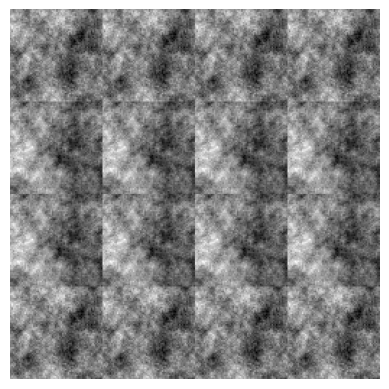

In [39]:
plot_tensor(noise[0])

In [40]:
import numpy as np

# Image dimensions: (4, 4, 1, 64, 64)
image_shape = (4, 4, 1, 64, 64)
num_rows, num_cols = image_shape[:2]

# Initialize an array to store the frequency values for each patch
frequency_array = np.zeros((num_rows, num_cols))

# Calculate and assign frequency values based on (i, j) position
for i in range(num_rows):
    for j in range(num_cols):
        frequency_array[i, j] = 2 ** (i + j)

# Print the frequency values assigned to each patch
print("Frequency array:")
print(frequency_array)


Frequency array:
[[ 1.  2.  4.  8.]
 [ 2.  4.  8. 16.]
 [ 4.  8. 16. 32.]
 [ 8. 16. 32. 64.]]


In [41]:
frequency_array[0][-1]

8.0

In [54]:
import numpy as np

# Image dimensions: (4, 4, 1, 64, 64)
image_shape = (4, 4, 1, 64, 64)
num_rows, num_cols = image_shape[:2]

# Initialize an array to store the frequency values for each patch
frequency_array = np.zeros((num_rows, num_cols))

# Calculate and assign frequency values based on (i, j) position
for i in range(num_rows):
    for j in range(num_cols):
        frequency_array[i, j] = 128*( 2 ** (-(i - 1) ** 2 - (j - 1) ** 2))

# Print the frequency values assigned to each patch
print("Frequency array:")
print(frequency_array)


Frequency array:
[[ 32.   64.   32.    4. ]
 [ 64.  128.   64.    8. ]
 [ 32.   64.   32.    4. ]
 [  4.    8.    4.    0.5]]


In [42]:
import numpy as np

# Image dimensions: (4, 4, 1, 64, 64)
image_shape = (16, 16, 1, 64, 64)
num_rows, num_cols = image_shape[:2]

# Calculate the center indices
center_i = (num_rows - 1) / 2
center_j = (num_cols - 1) / 2

# Initialize an array to store the frequency values for each patch
frequency_array = np.zeros((num_rows, num_cols))

# Calculate and assign frequency values based on distance from center
for i in range(num_rows):
    for j in range(num_cols):
        distance = np.sqrt((i - center_i) ** 2 + (j - center_j) ** 2)
#         print(distance)
        frequency_array[i, j] = 256*(2 ** -distance)

# Print the frequency values assigned to each patch
print("Frequency array:")
print(frequency_array)

Frequency array:
[[  0.16418546   0.26339199   0.40597488   0.59607764   0.82560712
    1.06755163   1.27586062   1.39798784   1.39798784   1.27586062
    1.06755163   0.82560712   0.59607764   0.40597488   0.26339199
    0.16418546]
 [  0.26339199   0.43757792   0.69994177   1.06755163   1.53430837
    2.05025856   2.51257728   2.79102993   2.79102993   2.51257728
    2.05025856   1.53430837   1.06755163   0.69994177   0.43757792
    0.26339199]
 [  0.40597488   0.69994177   1.16620823   1.85788963   2.79102993
    3.88651481   4.92158453   5.56861863   5.56861863   4.92158453
    3.88651481   2.79102993   1.85788963   1.16620823   0.69994177
    0.40597488]
 [  0.59607764   1.06755163   1.85788963   3.10811303   4.92158453
    7.22093136   9.55717019  11.09861256  11.09861256   9.55717019
    7.22093136   4.92158453   3.10811303   1.85788963   1.06755163
    0.59607764]
 [  0.82560712   1.53430837   2.79102993   4.92158453   8.28356923
   12.98556936  18.27897727  22.07690602  22.076

In [44]:
frequency_array.max()

156.81211559323287

In [45]:
frequency_array.min()

0.164185460804215

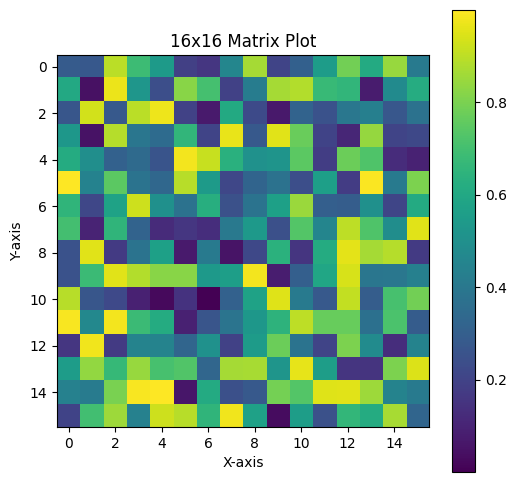

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 16x16 matrix with random values between 0 and 1
matrix = np.random.rand(16, 16)

# Create a figure and axis for the plot
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.imshow(matrix, cmap='viridis')  # Use the 'viridis' colormap for visualization
plt.colorbar()  # Display a colorbar

plt.title("16x16 Matrix Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()  # Show the plot


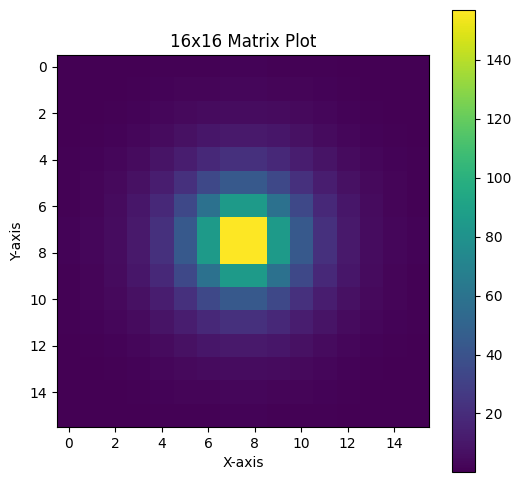

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 16x16 matrix with random values between 0 and 1
matrix = frequency_array

# Create a figure and axis for the plot
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.imshow(matrix, cmap='viridis')  # Use the 'viridis' colormap for visualization
plt.colorbar()  # Display a colorbar

plt.title("16x16 Matrix Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()  # Show the plot


In [72]:
import numpy as np

# Image dimensions: (4, 4, 1, 64, 64)
image_shape = (4, 4, 1, 64, 64)
num_rows, num_cols = image_shape[:2]

# Calculate the center indices
center_i = (num_rows - 1) / 2
center_j = (num_cols - 1) / 2

# Initialize an array to store the frequency values for each patch
frequency_array = np.zeros((num_rows, num_cols))

# Calculate and assign frequency values based on distance from center
for i in range(num_rows):
    for j in range(num_cols):
        distance = np.sqrt((i - center_i) ** 2 + (j - center_j) ** 2)
        print(distance)
        frequency_array[i, j] = 128*(2 ** -(distance))

# Print the frequency values assigned to each patch
print("Frequency array:")
print(frequency_array)


2.1213203435596424
1.5811388300841898
1.5811388300841898
2.1213203435596424
1.5811388300841898
0.7071067811865476
0.7071067811865476
1.5811388300841898
1.5811388300841898
0.7071067811865476
0.7071067811865476
1.5811388300841898
2.1213203435596424
1.5811388300841898
1.5811388300841898
2.1213203435596424
Frequency array:
[[29.41906839 42.77989896 42.77989896 29.41906839]
 [42.77989896 78.4060578  78.4060578  42.77989896]
 [42.77989896 78.4060578  78.4060578  42.77989896]
 [29.41906839 42.77989896 42.77989896 29.41906839]]


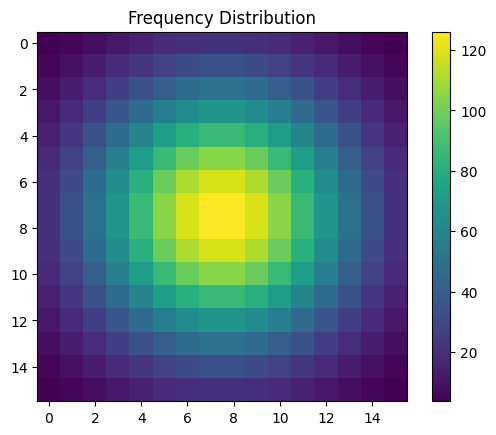

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Grid dimensions: (4, 4)
grid_shape = (16, 16)
num_rows, num_cols = grid_shape

# Desired average frequency value
delta = 128

# Standard deviation for the Gaussian distribution
sigma = 4

# Calculate the center indices
center_i = (num_rows + 1) / 2
center_j = (num_cols + 1) / 2

# Initialize an array to store the frequency values for each patch
frequency_array = np.zeros(grid_shape)

# Calculate and assign frequency values using Gaussian distribution
for i in range(num_rows):
    for j in range(num_cols):
        frequency_array[i, j] = delta * np.exp(
            -((i + 1 - center_i)**2 + (j + 1 - center_j)**2) / (2 * sigma**2)
        )

# Display the frequency values as an image
plt.imshow(frequency_array, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Frequency Distribution")
plt.show()


In [55]:
frequency_array

array([[  3.8053397 ,   5.89382542,   8.57546539,  11.72127145,
         15.05041046,  18.15426036,  20.57147205,  21.89821801,
         21.89821801,  20.57147205,  18.15426036,  15.05041046,
         11.72127145,   8.57546539,   5.89382542,   3.8053397 ],
       [  5.89382542,   9.12853539,  13.28194061,  18.15426036,
         23.31053173,  28.1178685 ,  31.86171919,  33.91662353,
         33.91662353,  31.86171919,  28.1178685 ,  23.31053173,
         18.15426036,  13.28194061,   9.12853539,   5.89382542],
       [  8.57546539,  13.28194061,  19.32510956,  26.41429297,
         33.91662353,  40.91125726,  46.35852788,  49.34839605,
         49.34839605,  46.35852788,  40.91125726,  33.91662353,
         26.41429297,  19.32510956,  13.28194061,   8.57546539],
       [ 11.72127145,  18.15426036,  26.41429297,  36.10405782,
         46.35852788,  55.91905865,  63.36459481,  67.45126006,
         67.45126006,  63.36459481,  55.91905865,  46.35852788,
         36.10405782,  26.41429297,  